**1.Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**2.Read the data as a data frame**

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

FileNotFoundError: [Errno 2] File insurance.csv does not exist: 'insurance.csv'

**3.a. Shape of the data**

In [3]:
#Shape of the data
shape = data.shape
print('Shape of dataframe :', shape)
print('Number of Rows     :', shape[0])
print('Number of Columns  :', shape[1])

Shape of dataframe : (1338, 7)
Number of Rows     : 1338
Number of Columns  : 7


**3.b. Data type of each attribute**

In [4]:
print(data.dtypes)

print("\n")
print("data type of age is       :", data['age'].dtype)
print("data type of sex is       :", data['sex'].dtype)
print("data type of bmi is       :", data['bmi'].dtype)
print("data type of children is  :", data['children'].dtype)
print("data type of smoker is    :", data['smoker'].dtype)
print("data type of region is    :", data['region'].dtype)
print("data type of charges is   :", data['charges'].dtype)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


data type of age is       : int64
data type of sex is       : object
data type of bmi is       : float64
data type of children is  : int64
data type of smoker is    : object
data type of region is    : object
data type of charges is   : float64


**3.c.Checking the presence of missing values**

In [5]:
print("No missing data as value is:",data.isnull().values.any())

No missing data as value is: False


**3.d. 5 point summary of numerical attributes**

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
print("since the number of count is same or")
print(data.notnull()["age"].sum()==data.notnull()["bmi"].sum()==data.notnull()["children"].sum()==data.notnull()["children"].sum())
print("we can cross verify that there are no null values")
print("Attributes'sex','smoker' and 'region' can be converted to do numerical calculations if needed")

print("\nmean and median is almost the same for all columns except for charges indicating a problem of skewness which may indicate high cost")
print("if standardized or normalised can give easier comparison across various units of calculation")

print("\non an average people have 1 child according to this dataset")
print('Very few people have more than 2 children. 75% of the people have 2 or less children')

since the number of count is same or
True
we can cross verify that there are no null values
Attributes'sex','smoker' and 'region' can be converted to do numerical calculations if needed

mean and median is almost the same for all columns except for charges indicating a problem of skewness which may indicate high cost
if standardized or normalised can give easier comparison across various units of calculation

on an average people have 1 child according to this dataset
Very few people have more than 2 children. 75% of the people have 2 or less children


**3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.**

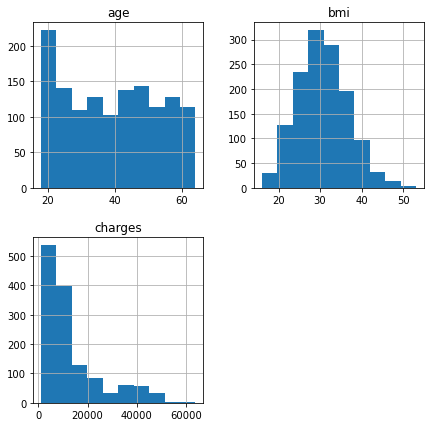

In [8]:
data1=data.drop(['children'], axis=1)
data1.hist(figsize=(7,7));

distribution follows bell shaped curve,follows normal distribution


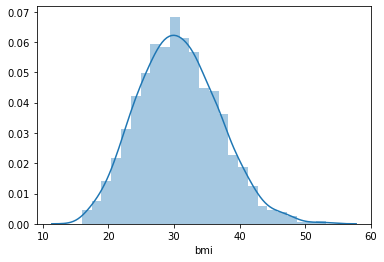

In [40]:
sns.distplot(data['bmi']);
print("distribution follows bell shaped curve,follows normal distribution")

distribution resembles an uniform distibution


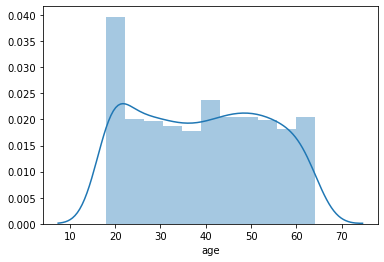

In [26]:
sns.distplot(data['age']);
print("distribution resembles an uniform distibution")

skewed distribution


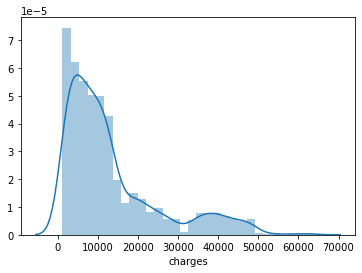

In [27]:
sns.distplot(data['charges']);
print("skewed distribution")

**3.f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns:**


In [41]:
print("Skewness measures the deviation from the normal distribution, which is symmetrical on both sides.\nA given distribution can be either be skewed to the left or the right")

print("\nSkew seen in bmi:",data.bmi.skew())
print("Therefore it is slightly positively skewed ")
print("\nSkew seen in age:",data.age.skew())
print("Therefore it is almost aligning with a normal distibution with minimal skew ")
print("\nSkew seen in charges:",data.charges.skew())
print("Highly skewed ")
print("The mean of positively skewed data will be greater than the median.")

Skewness measures the deviation from the normal distribution, which is symmetrical on both sides.
A given distribution can be either be skewed to the left or the right

Skew seen in bmi: 0.2840471105987448
Therefore it is slightly positively skewed 

Skew seen in age: 0.05567251565299186
Therefore it is almost aligning with a normal distibution with minimal skew 

Skew seen in charges: 1.5158796580240388
Highly skewed 
The mean of positively skewed data will be greater than the median.


**3.g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges‘ columns**

some outliers found in bmi column at the following row numbers for a threshold of 3


(array([ 116,  847, 1047, 1317], dtype=int64),)

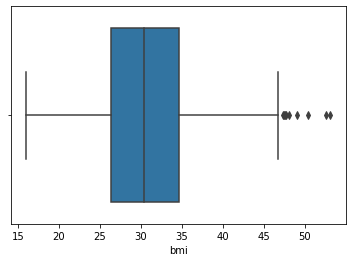

In [47]:
sns.boxplot(data["bmi"])
plt.xlabel('bmi')
print("some outliers found in bmi column at the following row numbers for a threshold of 3")

z = np.abs(stats.zscore(data['bmi']))   
threshold = 3
np.where(z > threshold)



no outlier seen in age column


(array([], dtype=int64),)

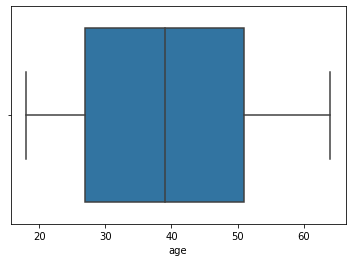

In [48]:
sns.boxplot(data["age"])
plt.xlabel('age')
print("no outlier seen in age column")
z = np.abs(stats.zscore(data['age']))   
threshold = 13
np.where(z > threshold)

Outliers found in charges column at the following row numbers for a threshold of 3


(array([  34,  543,  577,  819, 1146, 1230, 1300], dtype=int64),)

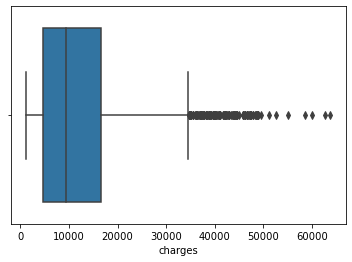

In [49]:
sns.boxplot(data["charges"])
#plt.boxplot(data["charges"]);
plt.xlabel('charges')
print("Outliers found in charges column at the following row numbers for a threshold of 3")
z = np.abs(stats.zscore(data['charges']))   
threshold = 3
np.where(z > threshold)


**3.h.Distribution of categorical columns (include children)**

MOst customers have no children


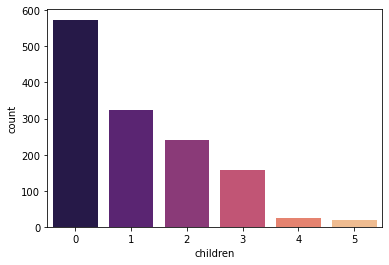

In [68]:
sns.countplot(data['children'],palette ='magma')
print("MOst customers have no children")

smokers with children vs non smokers with children,seem equally distributed


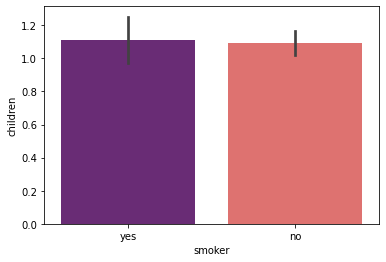

In [52]:
sns.barplot(x='smoker', y='children', data=data,palette ='magma',dodge=False);
print('smokers with children vs non smokers with children,seem equally distributed')

Distribution of charges levied on customers with varying amount of children shows more outliers for customers with no kids


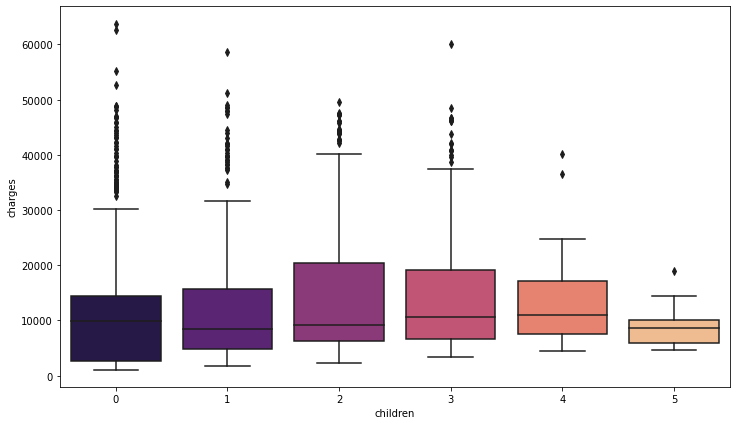

In [62]:
plt.figure(figsize=(12,7))
sns.boxplot(x='children', y='charges', data= data,palette ='magma')
print("Distribution of charges levied on customers with varying amount of children shows more outliers for customers with no kids")

Distibution of charfes levied on customer acroos regions, there is a lot of devaition observed


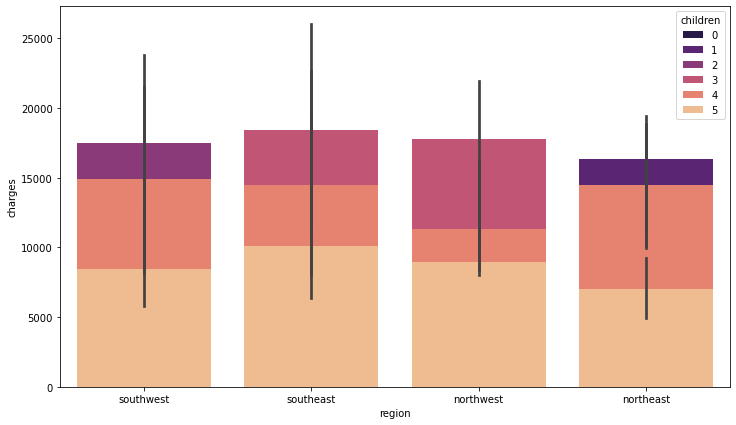

In [59]:
plt.figure(figsize=(12,7))
sns.barplot(data['region'], data['charges'], hue=data['children'], palette='magma',dodge=False) 
print('Distibution of charfes levied on customer acroos regions, there is a lot of devaition observed')

On average smokers are paying higher costs than the non-smoker, some outliers suggest exception to that observation


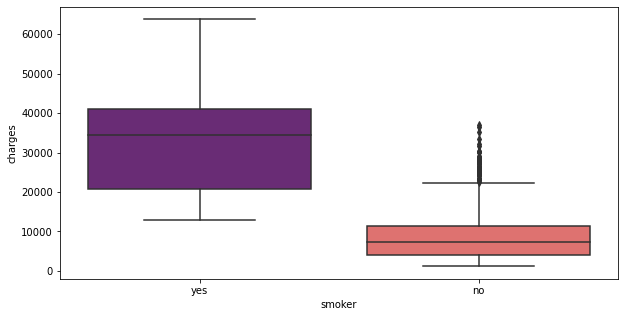

In [65]:
plt.figure(figsize=(10,5))
sns.boxplot(x='smoker', y='charges', data= data,palette ='magma')
print("On average smokers are paying higher costs than the non-smoker, some outliers suggest exception to that observation")

gender gap does not exist


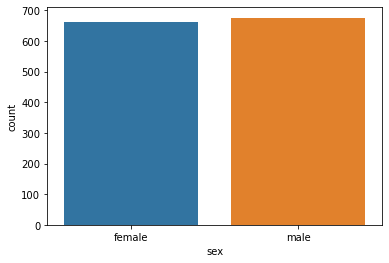

In [70]:
sns.countplot(data['sex'])
print("gender gap does not exist")

Distibution of customer age and the number of children


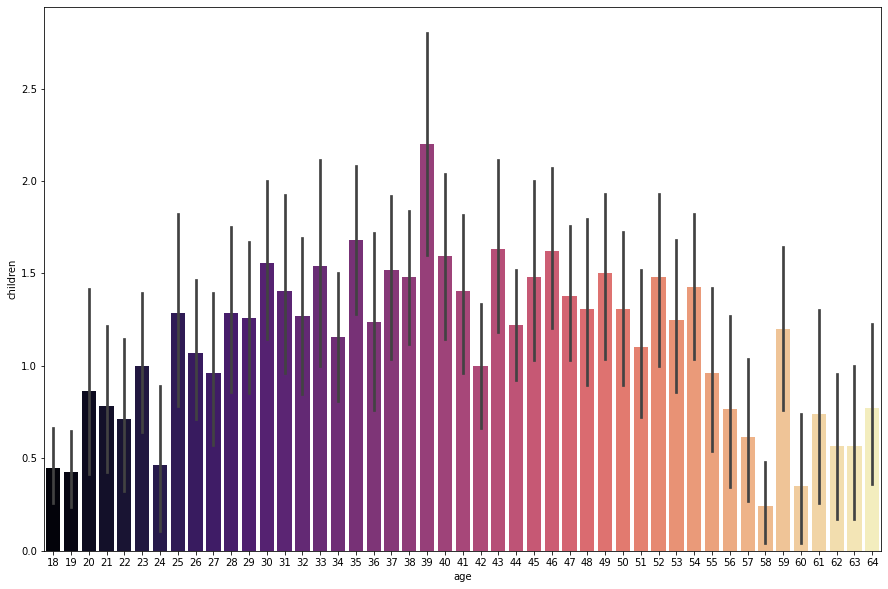

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x ='age', y ='children', data = data,palette ='magma');
print('Distibution of customer age and the number of children')

Distibution of number of children acroos age and location of customer 


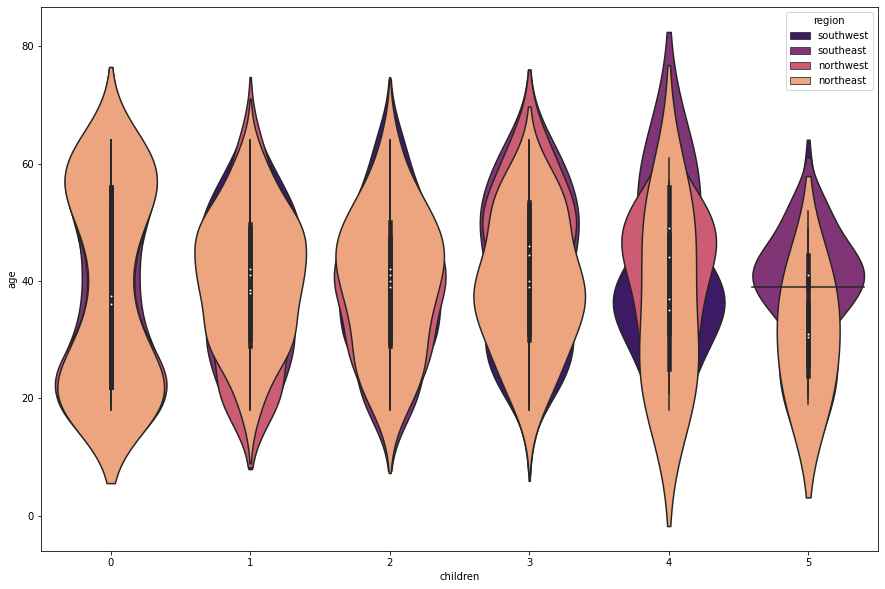

In [19]:
plt.figure(figsize=(15,10))
sns.violinplot(data['children'], data['age'], hue=data['region'], palette='magma',dodge=False) 
print('Distibution of number of children acroos age and location of customer ')

**3.i. Pair plot that includes all the columns of the data frame**

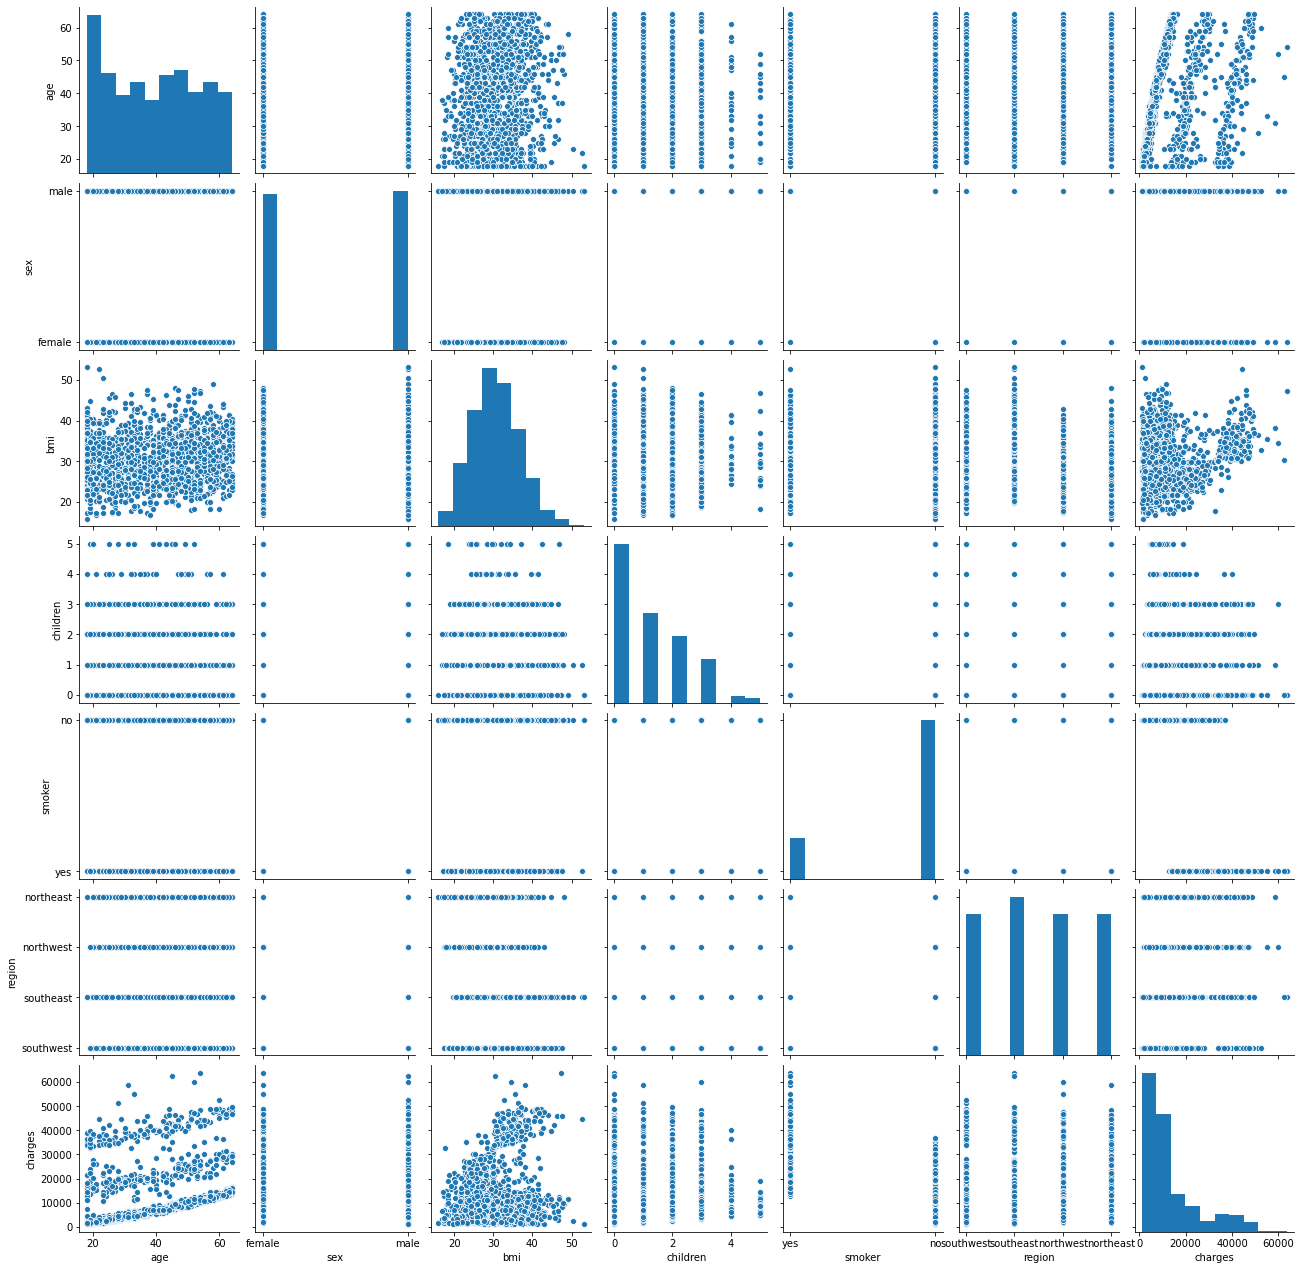

In [20]:
sns.pairplot(data, vars=data.columns[:])

**4.a. Do charges of people who smoke differ significantly from the people who don't?**

Charges are significantly higher for smokers compared to non smoking customers


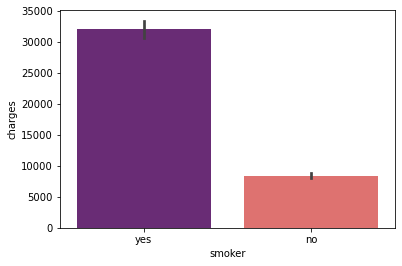

In [21]:
sns.barplot(x='smoker', y='charges', data=data,palette ='magma');
print("Charges are significantly higher for smokers compared to non smoking customers")

**4.b. . Does bmi of males differ significantly from that of females?**

Similiar bmi is seen across genders
fail to reject null hypothesis since p_value is : 0.08997637178984932 which is >0.05
We can conclude gender has no impact on bmi


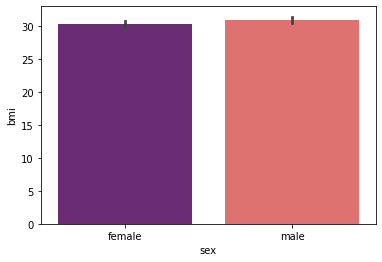

In [76]:
sns.barplot(x='sex', y='bmi', data=data,palette ='magma');
print('Similiar bmi is seen across genders')

Ho = "Gender has no impact on bmi"   
Ha = "Gender has an impact on bmi"

a = np.array(data[data.sex == 'male'].bmi)  
b = np.array(data[data.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(a,b, axis = 0)  
print("fail to reject null hypothesis since p_value is :",p_value,"which is >0.05\nWe can conclude gender has no impact on bmi")


**4.c. Is the proportion of smokers significantly different in different genders?**

In [29]:
print("Total number of smokers        : ", data[data['smoker']=='yes'].shape[0])
print("Total number of male smokers   : ", data[data['smoker']=='yes'][data['sex']=='male'].shape[0])
print("Total number of female smokers : ", data[data['smoker']=='yes'][data['sex']=='female'].shape[0]) 
print("Proportion of male smokers     : ",(data[data['smoker']=='yes'][data['sex']=='male'].shape[0])/data[data['smoker']=='yes'].shape[0])
print("Approx percent of male smokers : ",round(((data[data['smoker']=='yes'][data['sex']=='male'].shape[0])/data[data['smoker']=='yes'].shape[0])*100),'%')
print("Proportion of female smokers   : ",(data[data['smoker']=='yes'][data['sex']=='female'].shape[0])/data[data['smoker']=='yes'].shape[0])
print("Approx percent of female smoker: ",round(((data[data['smoker']=='yes'][data['sex']=='female'].shape[0])/data[data['smoker']=='yes'].shape[0])*100),'%')
print("\nTherefore the proportions are not significantly different ")


Total number of smokers        :  274
Total number of male smokers   :  159
Total number of female smokers :  115
Proportion of male smokers     :  0.5802919708029197
Approx percent of male smokers :  58 %
Proportion of female smokers   :  0.4197080291970803
Approx percent of female smoker:  42 %

Therefore the proportions are not significantly different 


<ipython-input-29-a41575f08181>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Total number of male smokers   : ", data[data['smoker']=='yes'][data['sex']=='male'].shape[0])
<ipython-input-29-a41575f08181>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Total number of female smokers : ", data[data['smoker']=='yes'][data['sex']=='female'].shape[0])
<ipython-input-29-a41575f08181>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Proportion of male smokers     : ",(data[data['smoker']=='yes'][data['sex']=='male'].shape[0])/data[data['smoker']=='yes'].shape[0])
<ipython-input-29-a41575f08181>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Approx percent of male smokers : ",round(((data[data['smoker']=='yes'][data['sex']=='male'].shape[0])/data[data['smoker']=='yes'].shape[0])*100),'%')
<ipython-input-29-a41575f08181>:6: UserWarnin

**4.d. Is the distribution of bmi across women with no children, one child and two children, the same?**

Distribution of bmi is not affected by the presence or absense of children


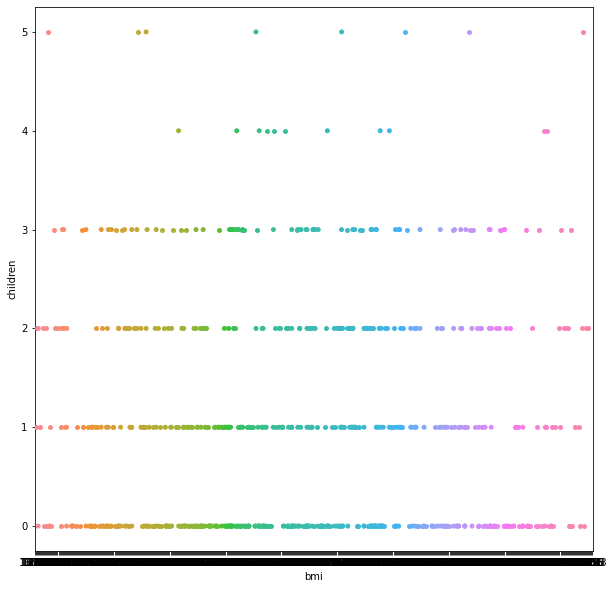

In [28]:
plt.figure(figsize=(10,10))
sns.stripplot(data['bmi'], data[data['sex']=='female']['children']);
print('Distribution of bmi is not affected by the presence or absense of children')